<a href="https://colab.research.google.com/github/Razzf/NeuralNetworkFromScratch/blob/master/NeuralNetworkFscratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp


from sklearn.datasets import make_circles

In [67]:
n = 500
p = 2

X, y = make_circles(n_samples=n, factor=0.5, noise=0.06)
y = y[:, np.newaxis]

In [68]:
plt.scatter(X[y[:, 0] == 0, 0], X[y[:, 0] == 0, 1], c='red')
plt.scatter(X[y[:, 0] == 1, 0], X[y[:, 0] == 1, 1], c='blue')
plt.axis('equal')
plt.show()

In [69]:
class Dense():
  def __init__(self, n_inputs, n_neurons, activation):

    self.act = activation
    self.biases = np.random.rand(1, n_neurons) * 2 - 1
    self.weights = np.random.rand(n_inputs, n_neurons) * 2 -1

In [70]:
class Funky():
  def __init__(self, function, vars):
    self.func = lambdify(vars, function)
    derivative = sp.diff(function, vars)
    self.prime = lambdify(vars, derivative)

In [ ]:
x = sp.Symbol('x')
sig_expression = 1 / (1 + sp.exp(-x))
sigmoid = Funky(sig_expression, x)

_x = np.linspace(-5, 5, 100)
plt.plot(_x, sigmoid.func(_x))
plt.show()


In [81]:
def create_nn(topology, act_f):

  nn = []

  for il, layer in enumerate(topology[:-1]):
    nn.append(Dense(topology[il], topology[il + 1], act_f))
  return nn


In [ ]:
topology = [p, 8, 4, 1]

network = create_nn(topology, sigmoid)

mse = (lambda Yp, Yr: np.mean((Yp - Yr) ** 2),
       lambda Yp, Yr: (Yp - Yr))

def train(nn, x, y, loss_f, lr=0.5, train=True):

  out = [(None, X)]
  for i in range(len(nn)):
    z = np.dot(out[-1][1], nn[i].weights) + nn[i].biases
    a = nn[i].act.func(z)
    out.append((z, a))

  if train:
    deltas = []
    for i in reversed(range(len(nn))):

      z = out[i + 1][0]
      a = out[i + 1][1]

      if i == len(nn) - 1:
        deltas.insert(0, loss_f[1](a, y) * nn[i].act.prime(a))
      else:
        deltas.insert(0, np.dot(deltas[0], _w.T) * nn[i + 1].act.prime(a))
      
      _w = nn[i].weights

      #gradient

      nn[i].biases = nn[i].biases - np.mean(deltas[0], axis= 0, keepdims=True) *lr
      nn[i].weights = nn[i].weights - out[i][1].T @ deltas[0] * lr

  return out[-1][1]

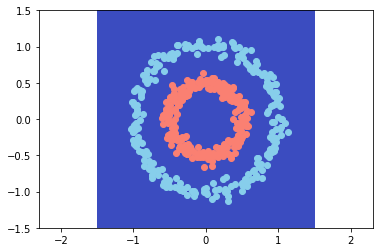

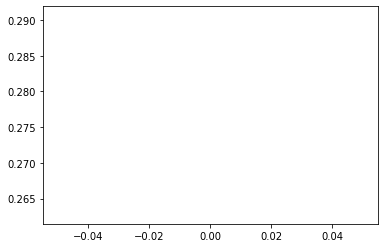

[0.99178642 0.99178642 0.99178642 0.99178642 0.99178642 0.99178642
 0.99178642 0.99178642 0.99178642 0.99178642 0.99178642 0.99178642
 0.99178642 0.99178642 0.99178642 0.99178642 0.99178642 0.99178642
 0.99178642 0.99178642 0.99178642 0.99178642 0.99178642 0.99178642
 0.99178642 0.99178642 0.99178642 0.99178642 0.99178642 0.99178642
 0.99178642 0.99178642 0.99178642 0.99178642 0.99178642 0.99178642
 0.99178642 0.99178642 0.99178642 0.99178642 0.99178642 0.99178642
 0.99178642 0.99178642 0.99178642 0.99178642 0.99178642 0.99178642
 0.99178642 0.99178642]


/usr/local/lib/python3.6/dist-packages/numpy/__init__.py:1: RuntimeWarning: overflow encountered in exp
  """


In [118]:
import time
from IPython.display import clear_output

n_net = create_nn(topology, sigmoid)

loss = []

for i in range(25):

  py = train(n_net, X, y, mse) # prediction y

  if i % 25 == 0:

    loss.append(mse[0](py, y))

    res = 50

    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)

    _y = np.zeros((res, res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _y[i0, i1] = train(n_net, np.array([[_x0, _x1]]), y, mse, train=False)[0][0]
    
    
    
    plt.pcolormesh(_x0, _x1, _y, cmap='coolwarm')
    plt.axis('equal')

    plt.scatter(X[y[:, 0] == 0, 0], X[y[:, 0] == 0, 1], c='skyblue')
    plt.scatter(X[y[:, 0] == 1, 0], X[y[:, 0] == 1, 1], c='salmon')

    clear_output(wait=True)
    plt.show()
    plt.plot(range(len(loss)), loss)
    plt.show()
    time.sleep(0.2)
    print(_y[:, 10])
  